In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

This notebook is supposed to show in the simplest way, how neurons learn.

# Single linear neuron

## Single feature

### Generate data

[-12. -10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]


<IPython.core.display.Javascript object>


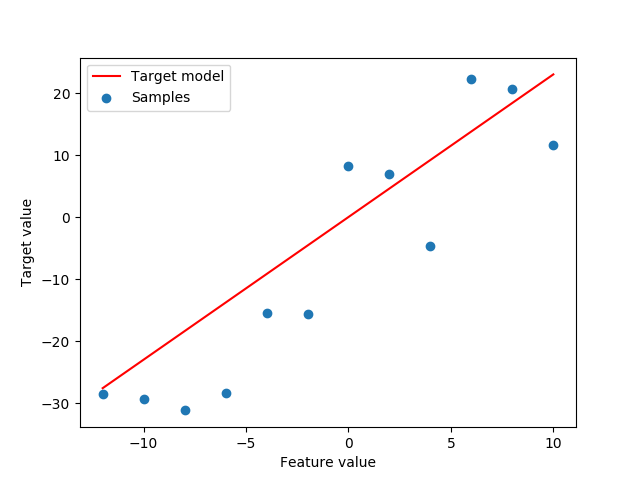

In [2]:
num_samples = 12
samples = np.linspace(-12, 10, num=num_samples)
print(samples)
# pick a weight to be learned
target_weight = 2.3
# generate data
targets = samples * target_weight
# add noise
targets += np.random.randn(len(samples)) * 10

#plot data
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Feature value')
ax.set_ylabel('Target value')
ax.scatter(samples, targets, label='Samples')
ax.plot(samples, samples * target_weight,'r', label='Target model')
legend = ax.legend(loc='upper left')
fig.canvas.draw()


### Learn weights - full batch learning

<IPython.core.display.Javascript object>


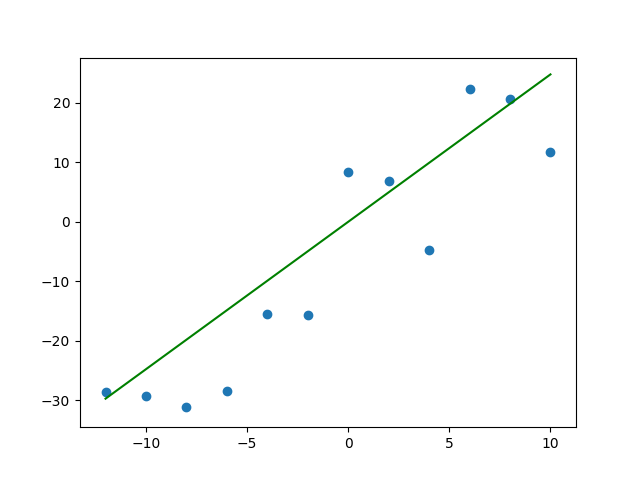

delta =   0.154	weight =  -0.346	loss = 3417.977	
delta =   0.147	weight =  -0.199	loss = 3139.410	
delta =   0.140	weight =  -0.059	loss = 2887.298	
delta =   0.133	weight =   0.073	loss = 2659.127	
delta =   0.126	weight =   0.200	loss = 2452.624	
delta =   0.120	weight =   0.320	loss = 2265.732	
delta =   0.114	weight =   0.434	loss = 2096.588	
delta =   0.109	weight =   0.543	loss = 1943.507	
delta =   0.103	weight =   0.647	loss = 1804.964	
delta =   0.098	weight =   0.745	loss = 1679.577	
delta =   0.094	weight =   0.839	loss = 1566.097	
delta =   0.089	weight =   0.928	loss = 1463.394	
delta =   0.085	weight =   1.013	loss = 1370.444	
delta =   0.081	weight =   1.093	loss = 1286.321	
delta =   0.077	weight =   1.170	loss = 1210.187	
delta =   0.073	weight =   1.243	loss = 1141.283	
delta =   0.069	weight =   1.312	loss = 1078.922	
delta =   0.066	weight =   1.378	loss = 1022.484	
delta =   0.063	weight =   1.441	loss = 971.405	
delta =   0.060	weight =   1.501	loss = 925.177	
de

In [3]:
learnrate = 0.001
epochs = 200
weight = -0.5 #np.random.rand(1)[0]
fig, ax = plt.subplots(1,1)

for e in range(epochs):
    z = weight * samples
    errors = targets - z
    delta = learnrate / len(samples) * np.dot(errors, samples)
    print('delta = {:>7.3f}'.format(delta), end='\t')
    weight += delta
    print('weight = {:>7.3f}'.format(weight), end='\t')
    loss = 0.5*np.dot(errors, errors)
    print('loss = {:>7.3f}'.format(loss), end='\t')
    print('')
    ax.clear()
    ax.scatter(samples, targets)
    ax.plot(samples, samples * weight,'g')
    fig.canvas.draw()
    time.sleep(0.01)
    if abs(delta) < 0.01:
        break
    


### Learn weights - online learning

<IPython.core.display.Javascript object>


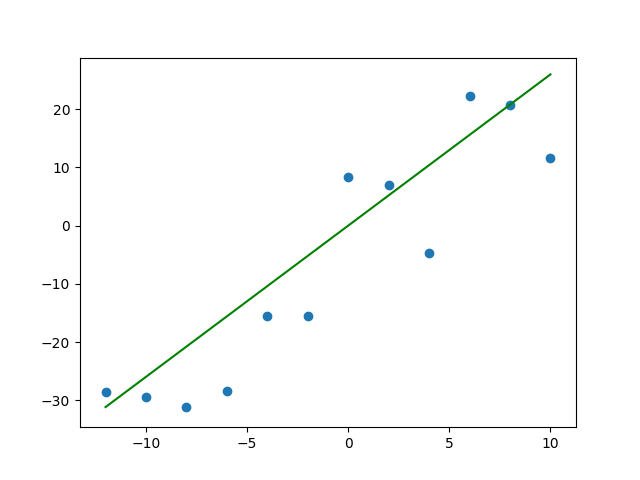

weight =  -0.500	error = -34.525	delta =   0.414	loss = 2701.237	
weight =  -0.086	error = -30.193	delta =   0.302	loss = 2242.037	
weight =   0.216	error = -29.446	delta =   0.236	loss = 1920.744	
weight =   0.452	error = -25.656	delta =   0.154	loss = 1728.296	
weight =   0.606	error = -13.052	delta =   0.052	loss = 1666.167	
weight =   0.658	error = -14.262	delta =   0.029	loss = 1632.895	
weight =   0.686	error =   8.289	delta =   0.000	loss = 1632.895	
weight =   0.686	error =   5.549	delta =   0.011	loss = 1620.078	
weight =   0.698	error =  -7.489	delta =  -0.030	loss = 1654.839	
weight =   0.668	error =  18.273	delta =   0.110	loss = 1530.169	
weight =   0.777	error =  14.441	delta =   0.116	loss = 1406.397	
weight =   0.893	error =   2.741	delta =   0.027	loss = 1378.179	
weight =   0.920	error = -17.483	delta =   0.210	loss = 1176.706	
weight =   1.130	error = -18.036	delta =   0.180	loss = 1024.042	
weight =   1.310	error = -20.693	delta =   0.166	loss = 900.643	
weight =   

In [4]:
learnrate = 0.001
epochs = 10
weight = -0.5 #np.random.rand(1)[0]
fig, ax = plt.subplots(1,1)

for e in range(epochs):
    for x, t in zip(samples, targets):
        print('weight = {:>7.3f}'.format(weight), end='\t')
        z = weight * x
        error = t - z
        print('error = {:>7.3f}'.format(error), end='\t')
        delta = learnrate * error * x
        print('delta = {:>7.3f}'.format(delta), end='\t')
        weight += delta
        errors = targets - weight * samples
        loss = 0.5*np.dot(errors, errors)
        print('loss = {:>7.3f}'.format(loss), end='\t')
        print('')
        
        ax.clear()
        ax.scatter(samples, targets)
        ax.plot(samples, samples * weight,'g')
        fig.canvas.draw()
        time.sleep(0.01)
    if abs(delta) < 0.01:
        break


### Learn weights - mini batch learning

<IPython.core.display.Javascript object>


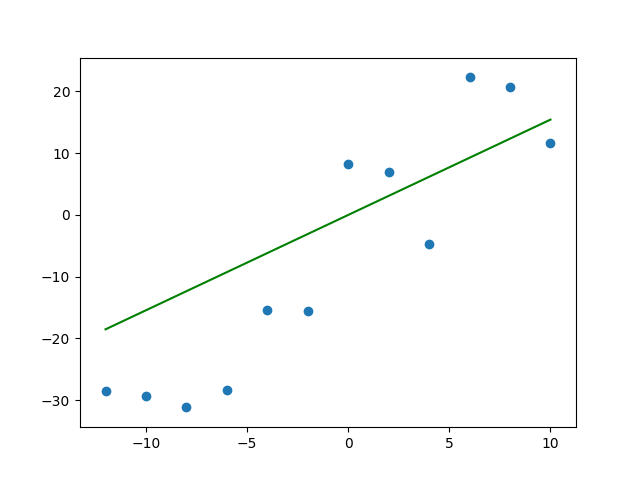

delta =   0.153	weight =  -0.347	loss = 3140.893	
delta =   0.014	weight =  -0.332	loss = 3115.585	
delta =   0.059	weight =  -0.274	loss = 3013.909	
delta =   0.144	weight =  -0.130	loss = 2772.994	
delta =   0.014	weight =  -0.116	loss = 2750.565	
delta =   0.053	weight =  -0.063	loss = 2665.576	
delta =   0.135	weight =   0.071	loss = 2455.984	
delta =   0.013	weight =   0.084	loss = 2436.082	
delta =   0.047	weight =   0.132	loss = 2365.284	
delta =   0.126	weight =   0.258	loss = 2182.829	
delta =   0.013	weight =   0.270	loss = 2165.145	
delta =   0.042	weight =   0.313	loss = 2106.404	
delta =   0.118	weight =   0.431	loss = 1947.467	
delta =   0.012	weight =   0.443	loss = 1931.733	
delta =   0.038	weight =   0.481	loss = 1883.219	
delta =   0.111	weight =   0.592	loss = 1744.672	
delta =   0.012	weight =   0.604	loss = 1730.655	
delta =   0.033	weight =   0.637	loss = 1690.803	
delta =   0.105	weight =   0.742	loss = 1569.942	
delta =   0.011	weight =   0.753	loss = 1557.438	


In [5]:
learnrate = 0.0005
epochs = 30
weight = -0.5 #np.random.rand(1)[0]
fig, ax = plt.subplots(1,1)
batch_size = 4

for e in range(epochs):
    for b in range(num_samples // batch_size):
        batch_samples = samples[b*batch_size:(b+1)*batch_size]
        batch_targets = targets[b*batch_size:(b+1)*batch_size]
        z = weight * batch_samples
        batch_errors = batch_targets - weight * batch_samples
        delta = learnrate / len(batch_samples) * np.dot(batch_errors, batch_samples)
        print('delta = {:>7.3f}'.format(delta), end='\t')
        weight += delta
        print('weight = {:>7.3f}'.format(weight), end='\t')
        errors = targets - weight * samples
        loss = 0.5*np.dot(errors, errors)
        print('loss = {:>7.3f}'.format(loss), end='\t')
        print('')
        ax.clear()
        ax.scatter(samples, targets)
        ax.plot(samples, samples * weight,'g')
        fig.canvas.draw()
        time.sleep(0.01)
    if abs(delta) < 0.01:
        break